In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
%matplotlib inline

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
diabetes = pd.read_csv('C:\\Users\\go\\Downloads\\diabetes.csv')

In [11]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diabetes.shape

(768, 9)

In [13]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
diabetes.isin(['0']).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

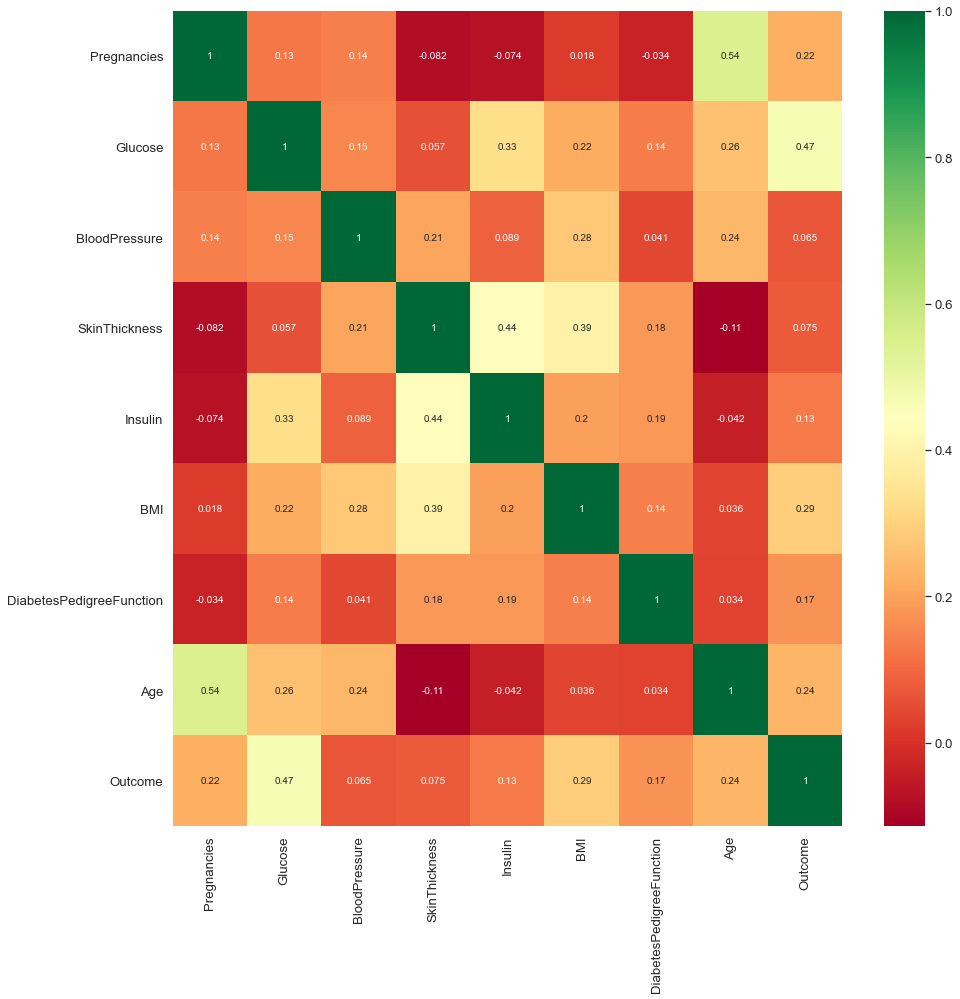

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns



corrmat= diabetes.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,15))

g=sns.heatmap(diabetes[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [17]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


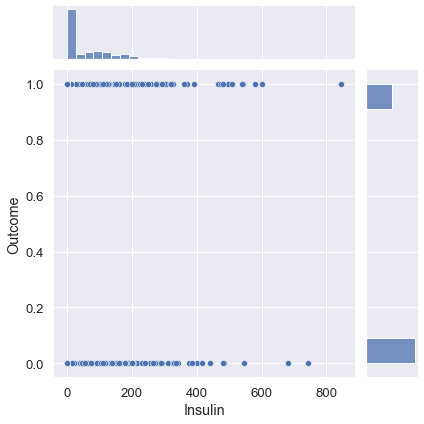

In [18]:
sns.jointplot(x= 'Insulin', y='Outcome' , data=diabetes)

In [19]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [20]:
len(diabetes.loc[diabetes['Pregnancies'] == 0])

111

In [21]:
diabetes.loc[diabetes['Insulin'] == 0]['Insulin'].value_counts()

0    374
Name: Insulin, dtype: int64

In [22]:
#diabetes[diabetes['SkinThickness']== 0]= diabetes['SkinThickness'].mean()

In [23]:
#diabetes[diabetes['Insulin']== 0 ] = diabetes['Insulin'].mean()

In [24]:
#diabetes[diabetes['Pregnancies'] == 0] = diabetes['Pregnancies'].mean()

In [25]:
diabetes.isin(['0']).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [26]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
y_true = diabetes['Outcome']

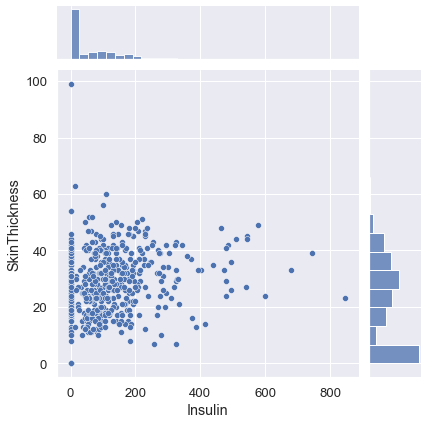

In [28]:
sns.jointplot(x= 'Insulin' ,y='SkinThickness' , data=diabetes)

In [29]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters=2,random_state=42)
y_labels=model.fit_predict(diabetes)
y_labels

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [30]:
from sklearn.metrics import f1_score

In [31]:
f1_score(y_labels,y_true)

0.397228637413395

In [32]:
from sklearn.model_selection import train_test_split 

In [33]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
y = diabetes['Outcome']

In [35]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [36]:
diabetes.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [37]:
x = diabetes.drop(['Outcome'],axis =1)

In [38]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [39]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [41]:

model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [42]:

y_pred=model.predict(x_test)

In [43]:

print(f1_score(y_pred,y_test)*100)

65.03067484662576


In [ ]:
model.intercept_

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()
model

LinearRegression()

In [47]:
model.fit(x_train,y_train)

LinearRegression()

In [48]:
model.score(x_test,y_test)

0.22240764966110582

In [49]:
model.coef_

array([ 0.00899394,  0.00574161, -0.00171114, -0.00025321, -0.0001265 ,
        0.01617347,  0.07290169,  0.0062645 ])

In [50]:
model.intercept_

-1.0013847024966278

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

In [52]:
svc=SVC()

In [53]:
cv_results_svc = cross_validate(svc,x,y, cv=5, return_train_score = True)

In [54]:
cv_results_svc['test_score'].mean()

0.7591460826754943

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
params = [{'c': [1,10,100], 'kernal':['Linear', 'sigmoid','poly']},{'c' : [1,10,100], 'kernal':['rbf'], 'gamma': [0.5,0.6,0.7,0.1,0.01,0.01]}] 

In [57]:
grid_search = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=5)

In [ ]:
Machine Learning

In [74]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [75]:
models= {"DT":DecisionTreeClassifier() ,
        "LR": LogisticRegression(),
        "KNN": KNeighborsClassifier()}

In [76]:
for name, model in models.items():
    print(f'USING MODEL : {NAME}')
    model.fit(x_train,y_train)
    print(f'TRAINING SCORE: {model.score(x_train,y_train)}')
    print(f'TEST : {model.score(x_test,y_tes)}')
    y_pred = model.predict(x_test)
    print(f'RME: {np.sqrt(mean_squared_error(y_test, y_pred))})
    print('...........................................................................')
    

SyntaxError: EOL while scanning string literal (<ipython-input-76-38134a74ff95>, line 7)

In [77]:

model1=DecisionTreeClassifier()
model2=LogisticRegression()
model3=KNeighborsClassifier()

In [78]:

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

C:\Users\go\myanaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [79]:

y_pred1=model1.predict(x_test)
y_pred2=model2.predict(x_test)
y_pred3=model3.predict(x_test)

In [88]:
## Classification models
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error

In [90]:
models= {"ACC":DecisionTreeClassifier() ,
        "Pr": LogisticRegression(),
        "RE": KNeighborsClassifier()}

In [91]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    y_pred = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print('-----------------------------------------------------------')

Using model: ACC
Training Score: 1.0
Test Score: 0.7012987012987013
RMSE: 0.5465357250000211
-----------------------------------------------------------
Using model: Pr


C:\Users\go\myanaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score: 0.7821229050279329
Test Score: 0.7402597402597403
RMSE: 0.5096471914376255
-----------------------------------------------------------
Using model: RE
Training Score: 0.8026070763500931
Test Score: 0.6883116883116883
RMSE: 0.5582905262390825
-----------------------------------------------------------
